In [1]:
from HeaderP import *

In [2]:
ages=importage("LAMOST",dist=True)
dist=importage("ALL",dist=True)

In [3]:
eew=pd.read_csv('LAMOST_excessabundance_enriched_stars.csv')

In [4]:
print(np.shape(ages))
ages=pd.merge(ages,dist[['X','Y','z','R','age']],left_on='age',right_on='age',how='inner')
print(np.shape(ages))

(208509, 90)
(208509, 94)


In [5]:
ages_eew=pd.merge(eew,ages,left_on='source_id',right_on='source_id_2',how='inner')


In [9]:
len(ages_eew)

219590

  0%|          | 0/9 [00:00<?, ?it/s]/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/Can

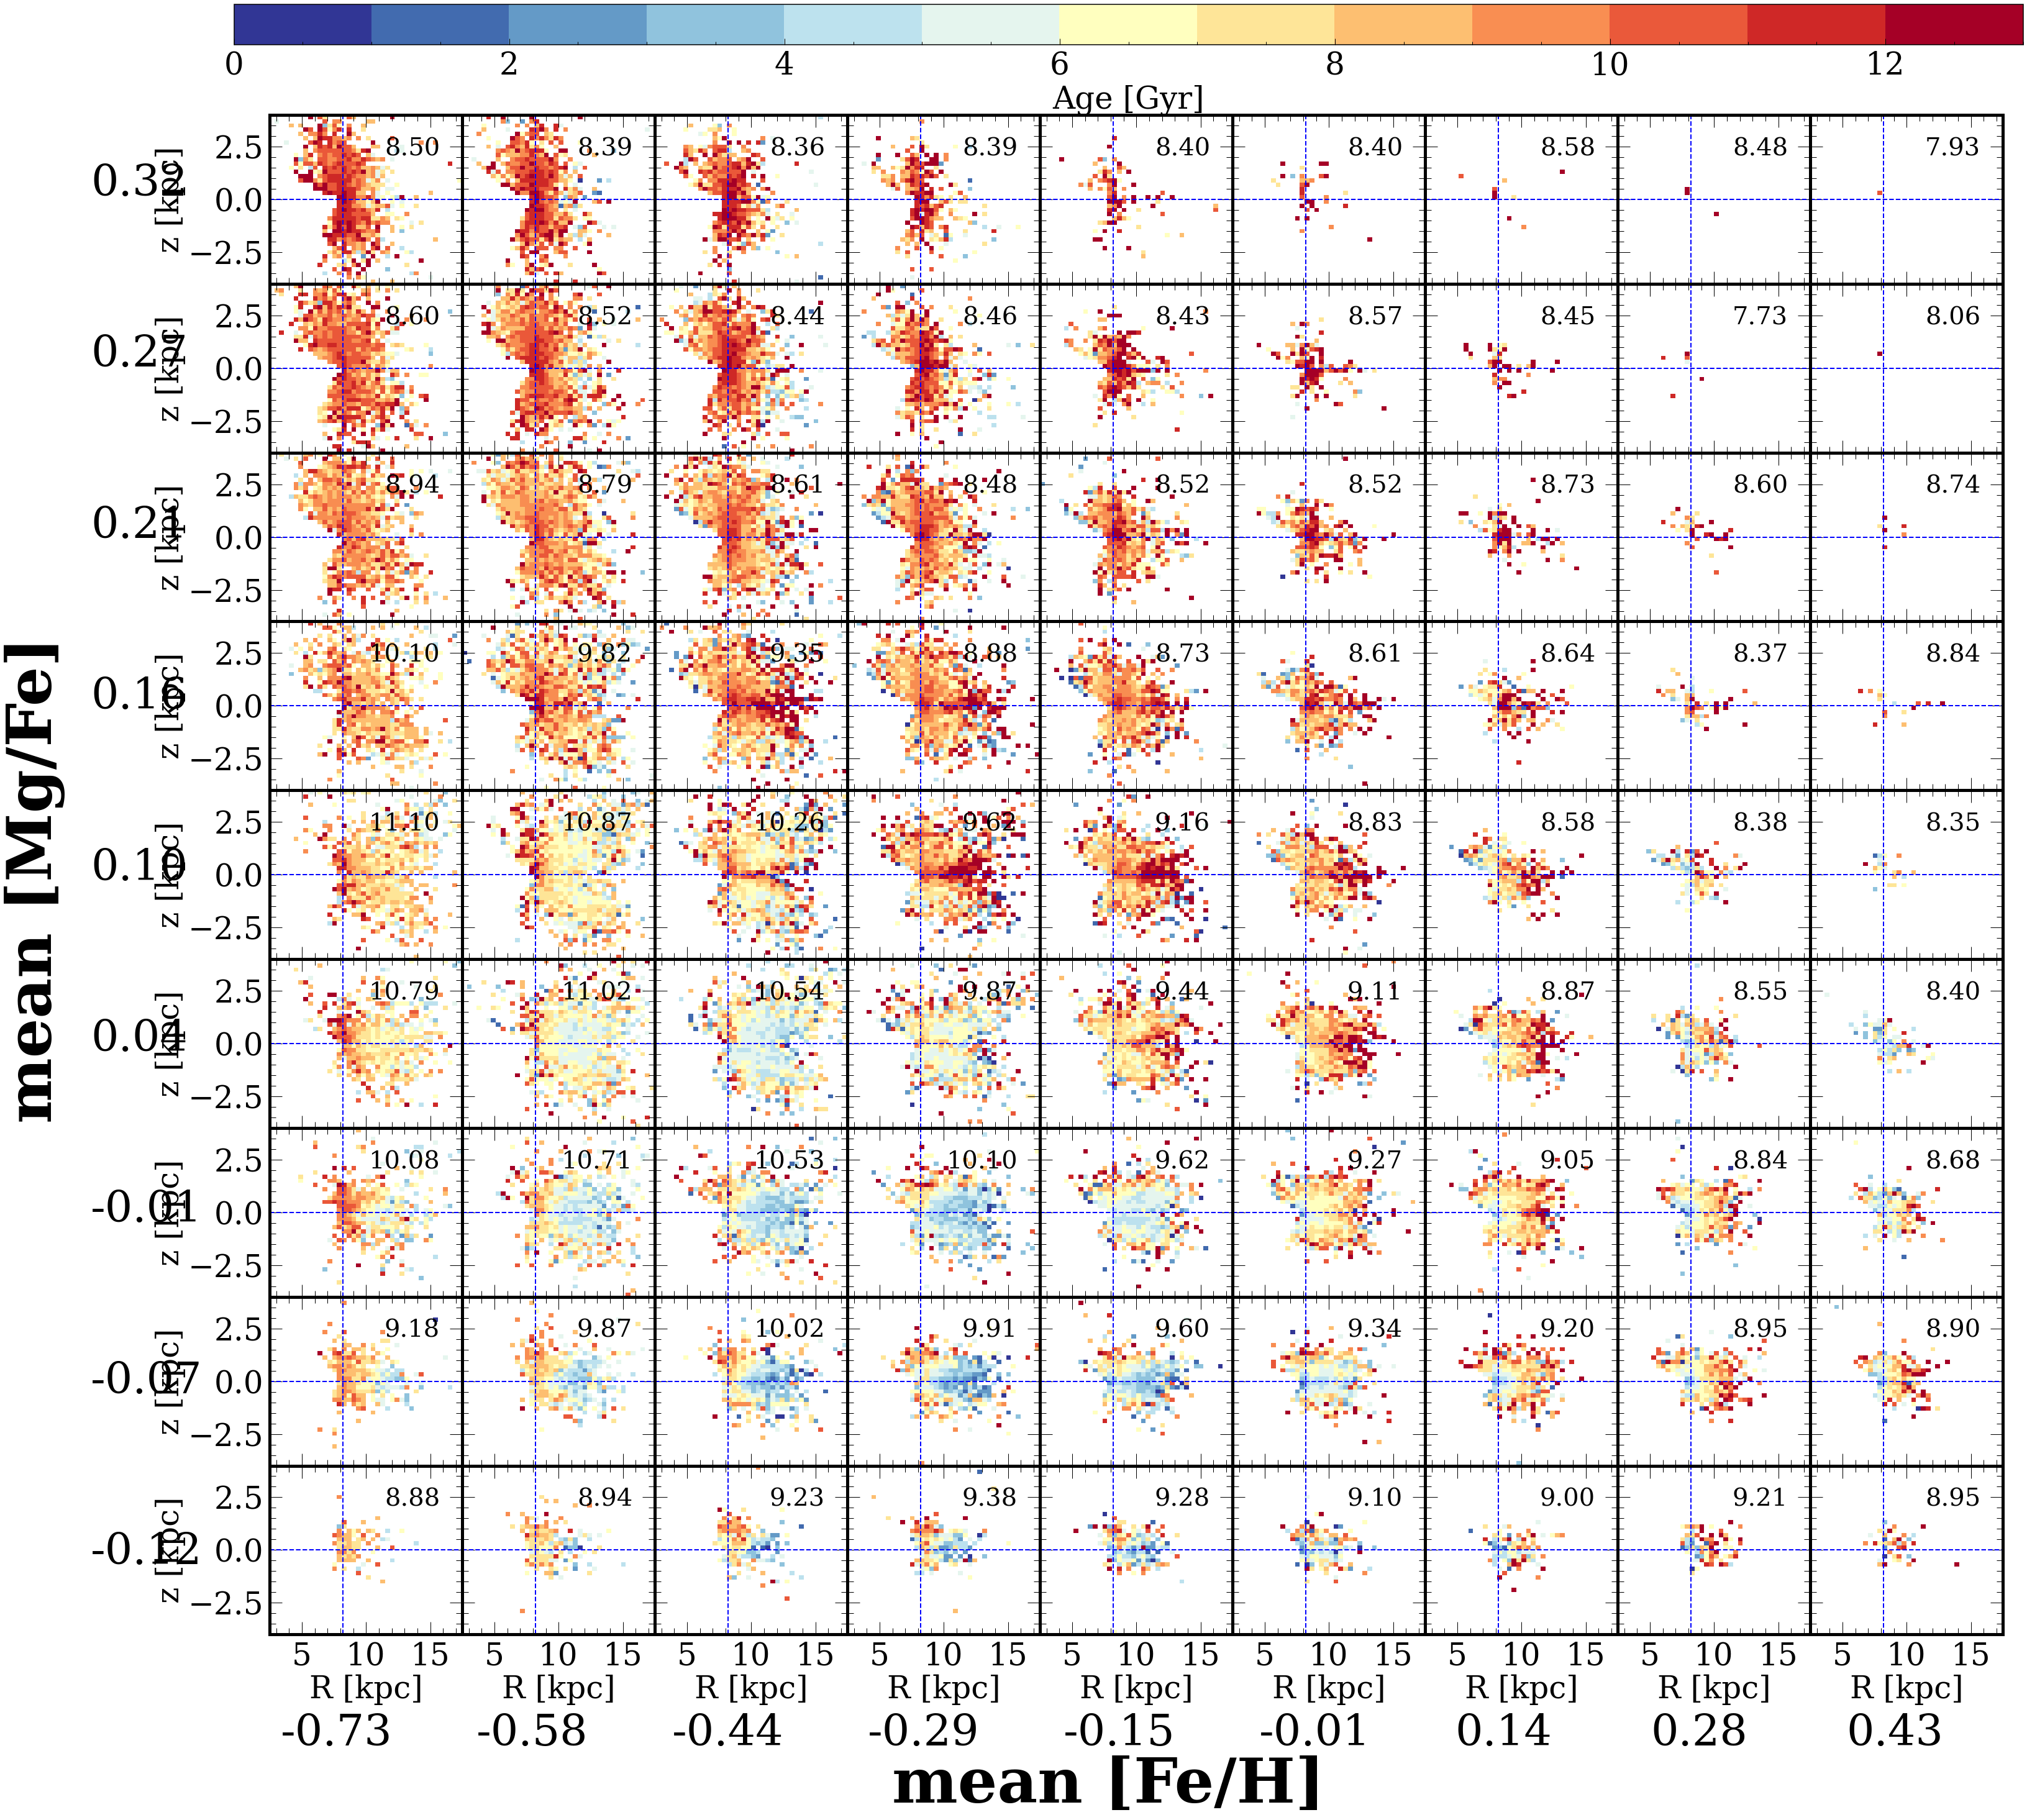

In [6]:
from scipy.ndimage import gaussian_filter
import math
from matplotlib import rc
rc('text', usetex=False) 
#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.4,-0.1,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(ages_eew))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=ages_eew.loc[ages_eew['mg_fe']>alpha[i+1]]
    df_all=df_all.loc[df_all['mg_fe']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['feh_y'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['feh_y'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
        if math.isnan(np.mean(df_all_z['R'])):
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001)
        else:
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001,label='%.2f'%np.mean(df_all_z['R']))
            
        for axis in ['top','bottom','left','right']:
            axarr[i,j].spines[axis].set_linewidth(5)
        
        axarr[i,j].plot([x1m,x2m],[0,0],'b--')
        axarr[i,j].plot([8.2,8.2],[y1m,y2m],'b--')
        axarr[i,j].legend(prop={'size': 40})
        
        #axarr[i,j].set_linewidth(3)
        count=count+1
        if j!=0:
            axarr[i,j].set_yticklabels([])
        else:
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        if i!=len(alpha)-2:
            axarr[i,j].set_xticklabels([])
        else:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
   
        
        axarr[i,j].set_xlim(x1m,x2m)
        axarr[i,j].set_ylim(y1m,y2m)

       # if i==len(alpha)-2 and j==0:
       #     axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
       #     axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [Mg/Fe]', ha='center', va='center', rotation='vertical',fontsize=100, fontweight='bold')
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100, fontweight='bold')

    
for i in range(0,10-1):
    fig.text(0.045, 0.16+0.085*i, '%.2f'%((0.3-alpha[i]-0.05+0.3-alpha[i+1]-0.05)/2.), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)
        


#plt.savefig('monofealpha.png')






  0%|          | 0/9 [00:00<?, ?it/s]/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/Can

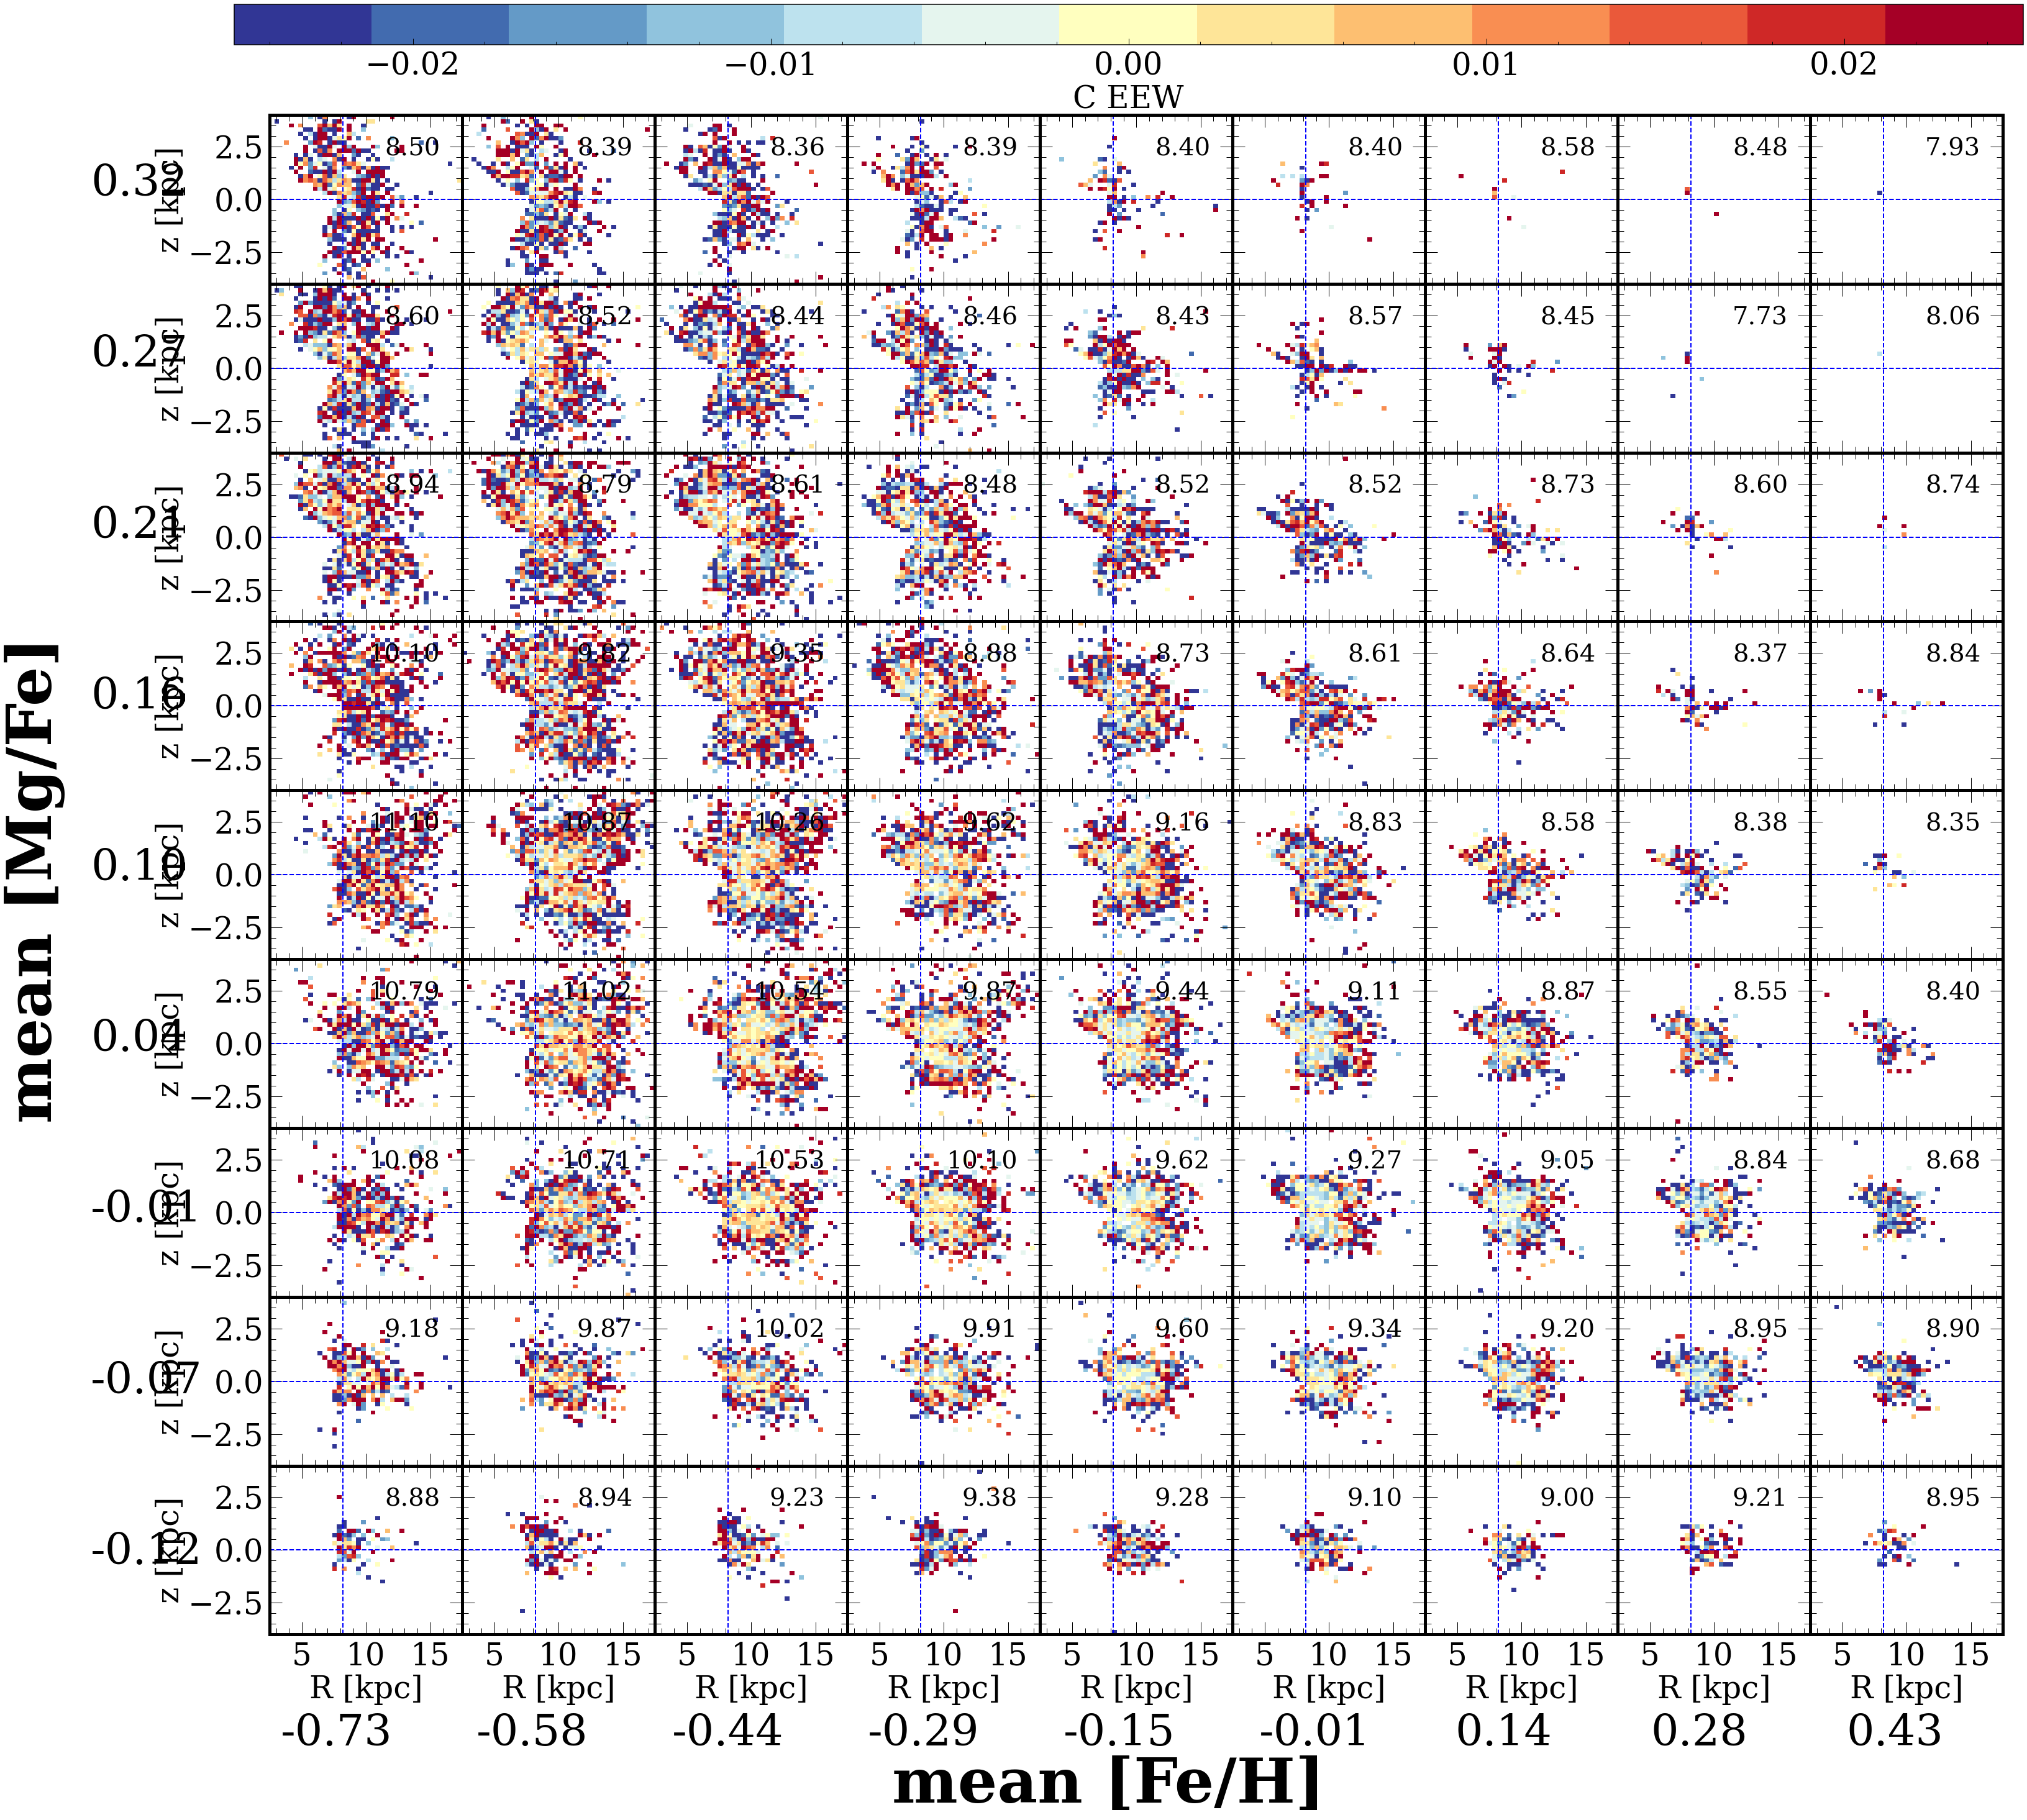

In [7]:
from scipy.ndimage import gaussian_filter
import math
from matplotlib import rc
rc('text', usetex=False) 
#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.4,-0.1,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(ages_eew))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=ages_eew.loc[ages_eew['mg_fe']>alpha[i+1]]
    df_all=df_all.loc[df_all['mg_fe']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['feh_y'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['feh_y'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['C_EEW'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=-0.025,vmax=0.025)
        if math.isnan(np.mean(df_all_z['R'])):
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001)
        else:
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001,label='%.2f'%np.mean(df_all_z['R']))
            
        for axis in ['top','bottom','left','right']:
            axarr[i,j].spines[axis].set_linewidth(5)
        
        axarr[i,j].plot([x1m,x2m],[0,0],'b--')
        axarr[i,j].plot([8.2,8.2],[y1m,y2m],'b--')
        axarr[i,j].legend(prop={'size': 40})
        
        #axarr[i,j].set_linewidth(3)
        count=count+1
        if j!=0:
            axarr[i,j].set_yticklabels([])
        else:
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        if i!=len(alpha)-2:
            axarr[i,j].set_xticklabels([])
        else:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
   
        
        axarr[i,j].set_xlim(x1m,x2m)
        axarr[i,j].set_ylim(y1m,y2m)

       # if i==len(alpha)-2 and j==0:
       #     axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
       #     axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('C EEW',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [Mg/Fe]', ha='center', va='center', rotation='vertical',fontsize=100, fontweight='bold')
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100, fontweight='bold')

    
for i in range(0,10-1):
    fig.text(0.045, 0.16+0.085*i, '%.2f'%((0.3-alpha[i]-0.05+0.3-alpha[i+1]-0.05)/2.), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)
        


#plt.savefig('monofealpha.png')







  0%|          | 0/9 [00:00<?, ?it/s]/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/Can

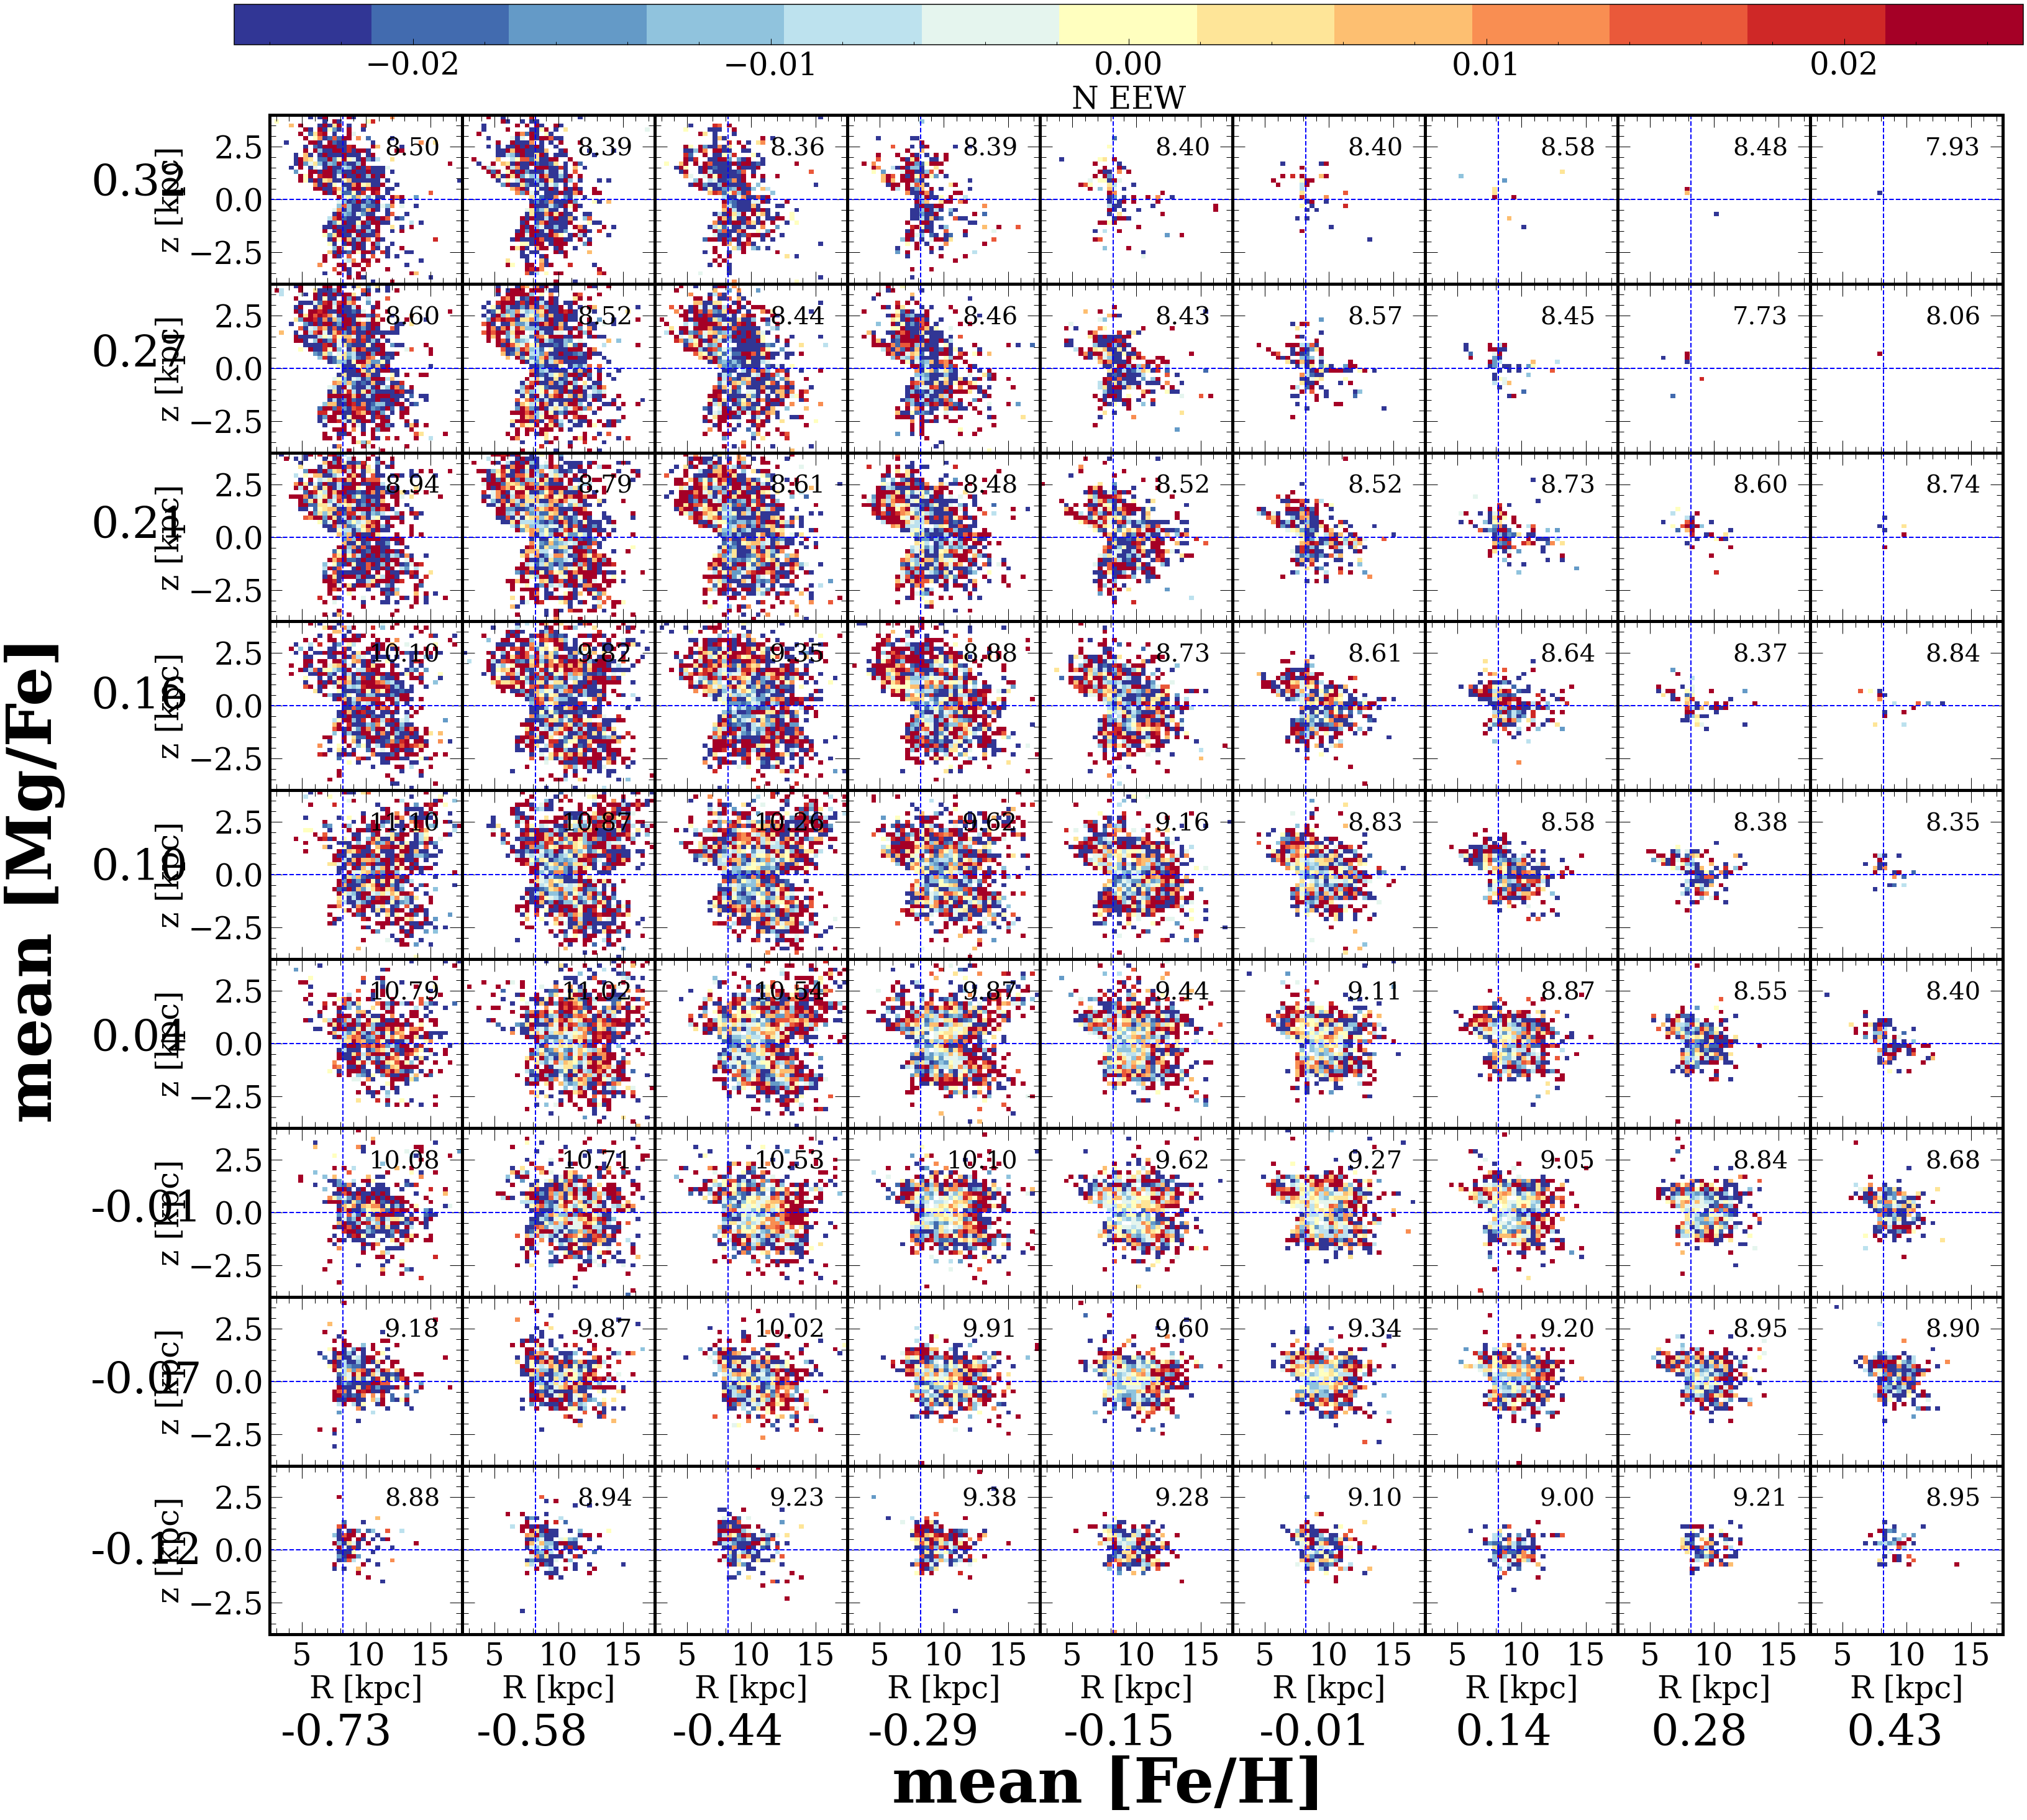

In [8]:
from scipy.ndimage import gaussian_filter
import math
from matplotlib import rc
rc('text', usetex=False) 
#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.4,-0.1,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(ages_eew))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=ages_eew.loc[ages_eew['mg_fe']>alpha[i+1]]
    df_all=df_all.loc[df_all['mg_fe']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['feh_y'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['feh_y'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['N_EEW'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=-0.025,vmax=0.025)
        if math.isnan(np.mean(df_all_z['R'])):
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001)
        else:
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001,label='%.2f'%np.mean(df_all_z['R']))
            
        for axis in ['top','bottom','left','right']:
            axarr[i,j].spines[axis].set_linewidth(5)
        
        axarr[i,j].plot([x1m,x2m],[0,0],'b--')
        axarr[i,j].plot([8.2,8.2],[y1m,y2m],'b--')
        axarr[i,j].legend(prop={'size': 40})
        
        #axarr[i,j].set_linewidth(3)
        count=count+1
        if j!=0:
            axarr[i,j].set_yticklabels([])
        else:
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        if i!=len(alpha)-2:
            axarr[i,j].set_xticklabels([])
        else:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
   
        
        axarr[i,j].set_xlim(x1m,x2m)
        axarr[i,j].set_ylim(y1m,y2m)

       # if i==len(alpha)-2 and j==0:
       #     axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
       #     axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('N EEW',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [Mg/Fe]', ha='center', va='center', rotation='vertical',fontsize=100, fontweight='bold')
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100, fontweight='bold')

    
for i in range(0,10-1):
    fig.text(0.045, 0.16+0.085*i, '%.2f'%((0.3-alpha[i]-0.05+0.3-alpha[i+1]-0.05)/2.), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)
        


#plt.savefig('monofealpha.png')








  0%|          | 0/9 [00:00<?, ?it/s]/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/CannonAges/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/Can

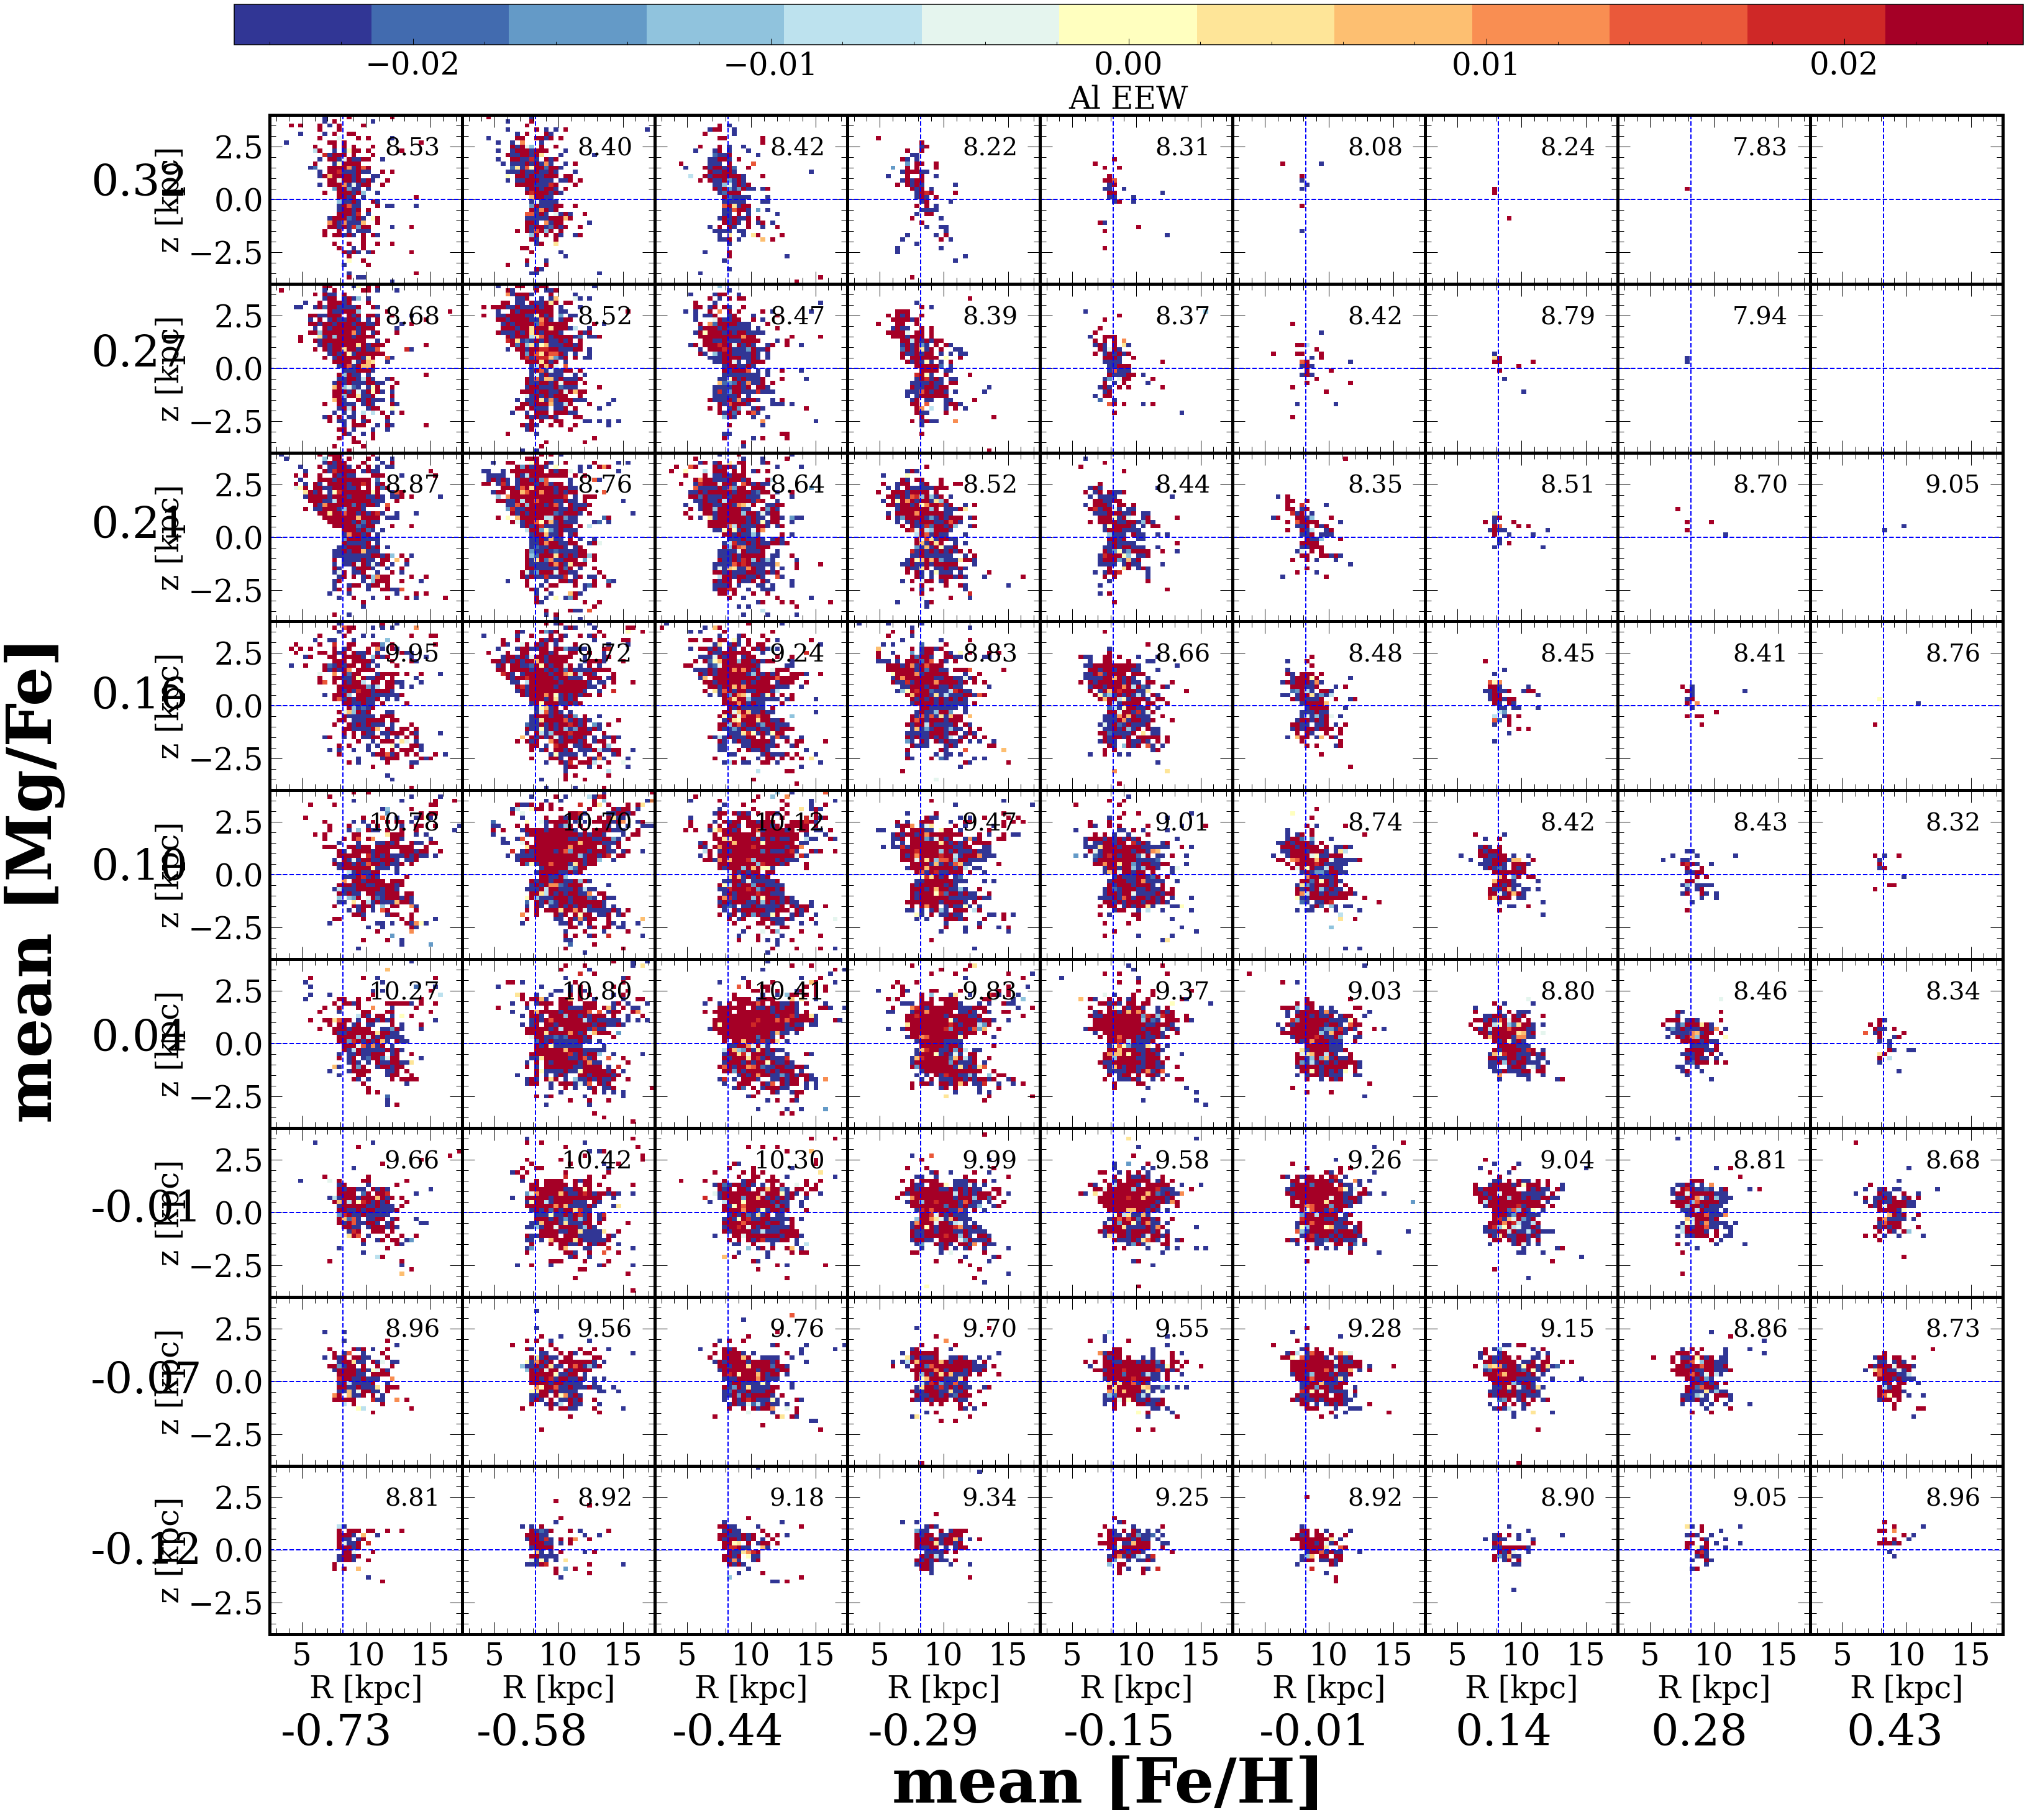

In [12]:
from scipy.ndimage import gaussian_filter
import math
from matplotlib import rc
rc('text', usetex=False) 
#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.4,-0.1,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(ages_eew))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0

ages_eew_al=ages_eew.dropna(subset=['Al_EEW'])

for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=ages_eew_al.loc[ages_eew_al['mg_fe']>alpha[i+1]]
    df_all=df_all.loc[df_all['mg_fe']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['feh_y'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['feh_y'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['Al_EEW'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=-0.025,vmax=0.025)
        if math.isnan(np.mean(df_all_z['R'])):
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001)
        else:
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001,label='%.2f'%np.mean(df_all_z['R']))
            
        for axis in ['top','bottom','left','right']:
            axarr[i,j].spines[axis].set_linewidth(5)
        
        axarr[i,j].plot([x1m,x2m],[0,0],'b--')
        axarr[i,j].plot([8.2,8.2],[y1m,y2m],'b--')
        axarr[i,j].legend(prop={'size': 40})
        
        #axarr[i,j].set_linewidth(3)
        count=count+1
        if j!=0:
            axarr[i,j].set_yticklabels([])
        else:
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        if i!=len(alpha)-2:
            axarr[i,j].set_xticklabels([])
        else:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
   
        
        axarr[i,j].set_xlim(x1m,x2m)
        axarr[i,j].set_ylim(y1m,y2m)

       # if i==len(alpha)-2 and j==0:
       #     axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
       #     axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('Al EEW',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [Mg/Fe]', ha='center', va='center', rotation='vertical',fontsize=100, fontweight='bold')
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100, fontweight='bold')

    
for i in range(0,10-1):
    fig.text(0.045, 0.16+0.085*i, '%.2f'%((0.3-alpha[i]-0.05+0.3-alpha[i+1]-0.05)/2.), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)
        


#plt.savefig('monofealpha.png')









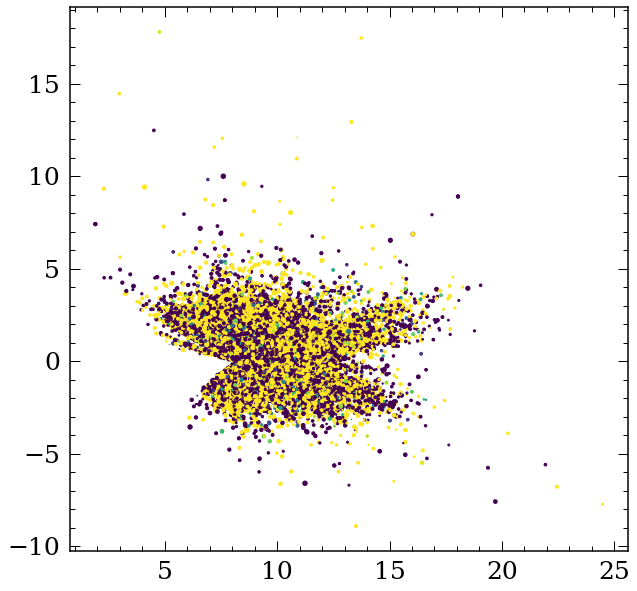

In [75]:
plt.figure(figsize=(10,8))
plt.scatter(ages_eew['R'],ages_eew['z'],c=ages_eew['Al_EEW'],s=ages_eew['age'],vmin=-0.025,vmax=0.025)


(100742,)


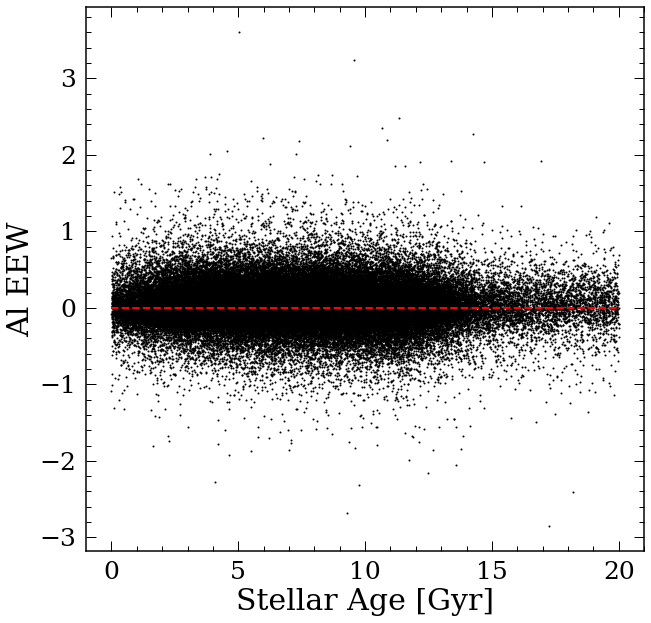

In [62]:

plt.scatter(ages_eew['age'],ages_eew['Al_EEW'],s=1,c='k')
plt.plot([0,20],[0,0],'r--')
plt.xlabel('Stellar Age [Gyr]')
plt.ylabel('Al EEW')
print(np.shape(ages_eew['Al_EEW'].dropna()))

(219445,)


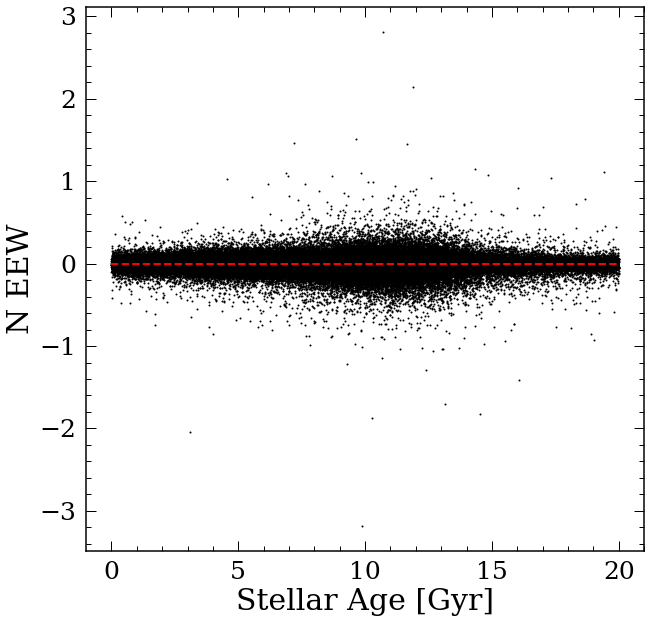

In [63]:
plt.scatter(ages_eew['age'],ages_eew['N_EEW'],s=1,c='k')
plt.plot([0,20],[0,0],'r--')
plt.xlabel('Stellar Age [Gyr]')
plt.ylabel('N EEW')
print(np.shape(ages_eew['N_EEW'].dropna()))

(219026,)


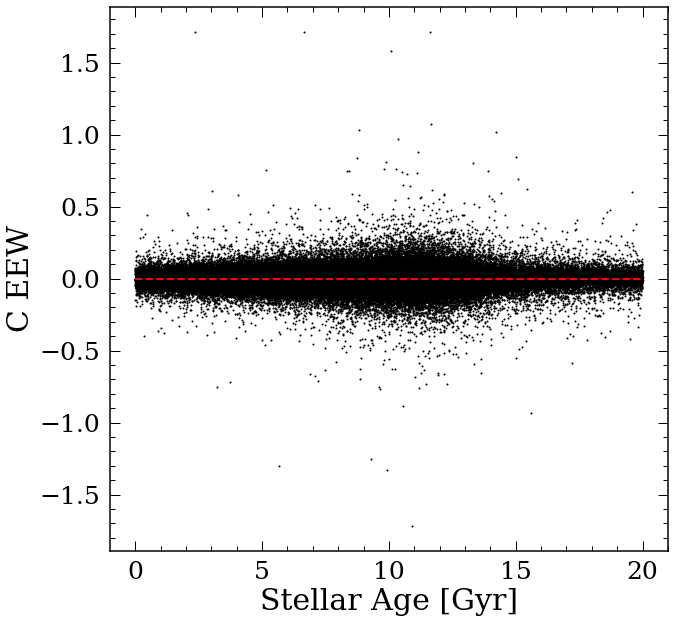

In [64]:
plt.scatter(ages_eew['age'],ages_eew['C_EEW'],s=1,c='k')
plt.plot([0,20],[0,0],'r--')
plt.xlabel('Stellar Age [Gyr]')
plt.ylabel('C EEW')
print(np.shape(ages_eew['C_EEW'].dropna()))